In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import scipy.stats as stats
pd.options.display.float_format = '{:.3f}'.format

In [15]:
# Generar datos para Chivilcoy (media = 500 kg, desviación estándar = 50 kg)
np.random.seed(0)
pesos_chivilcoy = np.random.normal(500, 50, 100)

# Generar datos para Bragado (media = 550 kg, desviación estándar = 40 kg)
pesos_bragado = np.random.normal(550, 40, 80)

# Crear DataFrames
df_chivilcoy = pd.DataFrame({'Peso': pesos_chivilcoy, 'Campo': 'Chivilcoy'})
df_bragado = pd.DataFrame({'Peso': pesos_bragado, 'Campo': 'Bragado'})

# Combinar en un solo DataFrame
df = pd.concat([df_chivilcoy, df_bragado])


___

# 1) Paradoja de simpson

El promedio global no es igual al promedio por campo 

In [30]:

promedio_global = df['Peso'].mean()

# Promedio por campo
promedio_por_campo = df.groupby('Campo')['Peso'].mean()



Promedio global 526.2856115700431


In [32]:
print(f"Promedio global {promedio_global}")


Promedio global 526.2856115700431


In [31]:
print(f"Promedio por campo {promedio_por_campo}")

Promedio por campo Campo
Bragado     555.405
Chivilcoy   502.990
Name: Peso, dtype: float64


___

# 2) Histogramas, Media y Desviación Estándar
Ahora, vamos a plotear los histogramas y calcular la media y la desviación estándar para cada campo.


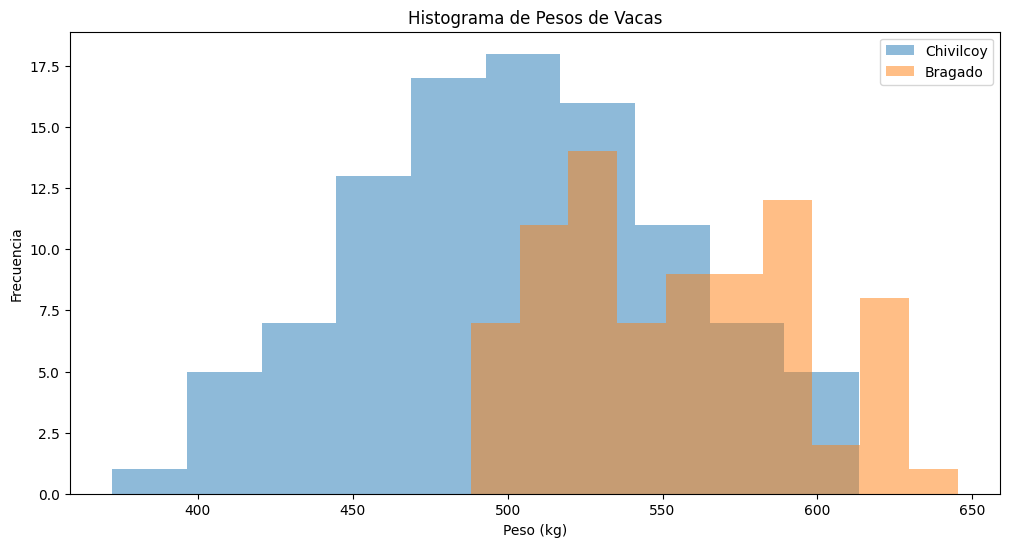

media de chivilcoy 502.9904007767243, std_chivilcoy 50.394112235828985,
 media_bragado 555.4046250616916, std_bragado 40.15785019037109


In [17]:
# Histogramas
plt.figure(figsize=(12, 6))
plt.hist(df_chivilcoy['Peso'], alpha=0.5, label='Chivilcoy')
plt.hist(df_bragado['Peso'], alpha=0.5, label='Bragado')
plt.legend(loc='upper right')
plt.title('Histograma de Pesos de Vacas')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.show()

# Media y desviación estándar por campo
media_chivilcoy = np.mean(pesos_chivilcoy)
std_chivilcoy = np.std(pesos_chivilcoy)

media_bragado = np.mean(pesos_bragado)
std_bragado = np.std(pesos_bragado)

print(f"media de chivilcoy {media_chivilcoy}, std_chivilcoy {std_chivilcoy},\n media_bragado {media_bragado}, std_bragado {std_bragado}")

___

# 3) Inferencia de una Nueva Vaca
Utilizaremos el Teorema Central del Límite para inferir de qué población podría provenir una nueva vaca, dado su peso.

La distribución normal es fundamental para la inferencia estadística porque muchas variables en la naturaleza siguen una distribución aproximadamente normal. 

Según el Teorema Central del Límite, si tenemos una muestra suficientemente grande, la distribución de la media muestral será aproximadamente normal, independientemente de la distribución de la población.


Supongamos que tenemos una nueva vaca con un peso de, por ejemplo, 520 kg. Queremos determinar de qué campo (Chivilcoy o Bragado) es más probable que provenga esta vaca. Para ello, podemos utilizar un intervalo de confianza.

Calcular el intervalo de confianza para cada campo: Utilizaremos la media y la desviación estándar que ya hemos calculado para cada campo. Podemos calcular un intervalo de confianza del 95% (o cualquier otro valor que elijamos) para el peso de las vacas en cada campo.

In [23]:
# Intervalo de confianza para Chivilcoy
intervalo_chivilcoy = stats.norm.interval(0.95, loc=media_chivilcoy, scale=std_chivilcoy)

# Intervalo de confianza para Bragado
intervalo_bragado = stats.norm.interval(0.95, loc=media_bragado, scale=std_bragado)


print(f"Para tener una confianza del 95% el intervalo de chivilcoy es de  {intervalo_chivilcoy},\ny el intervalo de bragado es {intervalo_bragado}")

Para tener una confianza del 95% el intervalo de chivilcoy es de  (404.2197557616302, 601.7610457918183),
y el intervalo de bragado es (476.6966849920093, 634.1125651313739)


Evaluar en qué intervalo cae el peso de la nueva vaca: Si el peso de la nueva vaca cae dentro del intervalo de confianza de uno de los campos pero no del otro, podemos estar razonablemente seguros de que la vaca proviene de ese campo.

Si el peso cae dentro de ambos intervalos, la decisión es más incierta y podríamos necesitar más información o aplicar otras técnicas estadísticas.

In [26]:
peso_nueva_vaca = 465  # Ejemplo

# Cálculo de la probabilidad de que la vaca provenga de cada campo
prob_chivilcoy = stats.norm.pdf(peso_nueva_vaca, media_chivilcoy, std_chivilcoy)
prob_bragado = stats.norm.pdf(peso_nueva_vaca, media_bragado, std_bragado)

print(f"La prob de chivilcoy es {prob_chivilcoy:2f}, la prob de bragado es {prob_bragado:2f}")


La prob de chivilcoy es 0.005958, la prob de bragado es 0.000788


___

# 4) T-Test
Por último, realizamos un t-test para evaluar si hay una diferencia significativa en el tratamiento de alimentación entre los campos.

In [27]:
t_stat, p_value = stats.ttest_ind(pesos_chivilcoy, pesos_bragado)

# Resultados
t_stat, p_value

(-7.533315514884322, 2.401672359590475e-12)

(-7.533315514884322, 2.401672359590475e-12)

El resultado del t-test incluye dos componentes: la estadística t (t_stat) y el valor p (p_value).

___

## 4.1) Estadística t (t_stat)
El valor de t_stat = -7.533 representa la estadística t calculada a partir de las dos muestras (pesos de las vacas en Chivilcoy y Bragado). Un valor de t negativo indica que la media de la primera muestra (Chivilcoy) es menor que la media de la segunda muestra (Bragado). Cuanto más grande es el valor absoluto de la estadística t, más fuerte es la evidencia en contra de la hipótesis nula (que ambas muestras tienen medias iguales).

## 4.2) Valor p (p_value)
El valor p = 2.401672359590475e-12 es extremadamente pequeño, prácticamente cero. En el contexto del t-test, un valor p muy pequeño (generalmente menor que 0.05) es un indicador fuerte contra la hipótesis nula. En otras palabras, hay evidencia muy fuerte para rechazar la hipótesis nula de que las medias de los dos grupos son iguales.

## 4.3) Interpretación
En resumen, el resultado del t-test sugiere que hay una diferencia estadísticamente significativa en los pesos de las vacas entre los campos de Chivilcoy y Bragado. El valor de la estadística t indica que las vacas en Bragado tienden a pesar más que las de Chivilcoy. El valor p extremadamente pequeño nos da confianza en esta conclusión.

___

# 5) Cars

In [33]:
df = sns.load_dataset('mpg')

## 5.1) Bootstraping
Teoría: Bootstraping es un método para estimar la distribución de una estadística (como la media o la desviación estándar) re-muestreando con reemplazo del conjunto de datos original.

In [ ]:
#saco los nulos para mejor analisis
original_data = df['mpg'].dropna()

In [34]:
def bootstrap_sample(data, n):
    return np.random.choice(data, size=n, replace=True)

In [38]:


# Inicializar una lista vacía para almacenar las medias de las muestras de bootstrap
bootstrap_means = []


for _ in range(100):
    sample = bootstrap_sample(original_data, len(original_data))
    sample_mean = sample.mean()
    bootstrap_means.append(sample_mean)

# Calcular la media y la desviación estándar de las medias de las muestras de bootstrap
mean_of_means = np.mean(bootstrap_means)
std_of_means = np.std(bootstrap_means)

mean_of_means, std_of_means


(23.469723618090452, 0.4073169096009236)

___

**¿Qué es Bootstrap?**
Bootstrap es una técnica de re-muestreo que permite estimar la distribución de una estadística (como la media o la desviación estándar) al crear múltiples muestras nuevas a partir de una única muestra original. Estas nuevas muestras se generan seleccionando elementos aleatoriamente de la muestra original, con reemplazo.

**¿Qué hace el código?**
Función bootstrap_sample: Esta función toma una muestra de datos y su tamaño n, y devuelve una nueva muestra generada al seleccionar aleatoriamente n elementos de la muestra original, con reemplazo.

* **Datos Originales?**: Estamos utilizando una columna llamada 'mpg' del DataFrame df como nuestros datos originales. Eliminamos cualquier valor nulo con .dropna().

* Inicialización de bootstrap_means: Esta es una lista vacía donde almacenaremos las medias de todas nuestras muestras de bootstrap.

* Loop for: Aquí, creamos 1000 muestras de bootstrap. Para cada una, calculamos su media y la agregamos a la lista bootstrap_means.

### 5.1.1) Cálculo de Media y Desviación Estándar: 

Finalmente, calculamos la media y la desviación estándar de todas las medias de muestras de bootstrap que hemos recopilado.

**¿Qué significan los resultados?**
- Media de las Medias (mean_of_means): Esta es una estimación de la media de la población a partir de las muestras de bootstrap. Es una forma de confirmar la media de la muestra original.

- Desviación Estándar de las Medias (std_of_means): Esta es una estimación de cuánto varían las medias de las muestras de bootstrap. Nos da una idea del error estándar y de cómo de precisa es nuestra estimación de la media.

Estos dos valores juntos nos dan una idea más precisa de la distribución de la estadística (en este caso, la media) que estamos estudiando.

In [39]:
original_data.mean()

23.514572864321607